In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MOCAP Camera (no headset) - MOTA

In [3]:
results_files = ['../../results/4_mocap_cam/no_headset/mocap_cam_1_results.csv',
                 '../../results/4_mocap_cam/no_headset/mocap_cam_2_results.csv',
                 '../../results/4_mocap_cam/no_headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Count gt, fp, fn, and ids
    gt=0
    fp=0
    fn=0
    ids=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])

    ids += (len(gt1_ids)-1)
    ids += (len(gt2_ids)-1)

    print(file.split('/')[-1])
    print("fp: %s" % fp)
    print("fn: %s" % fn)
    print("gt: %s" % gt)
    print("ids: %s" % ids)
    print(gt1_ids)
    print(gt2_ids)
    print("MOTA: %s" % (1 - (fp+fn+ids)/gt))
    print("Avg comp. time: %s" % (np.mean(results_df['delta_t'])/1000000000))
    print("Max comp. time: %s" % (np.max(results_df['delta_t'])/1000000000))
    print("Avg FPS: %s" % (1000000000/np.mean(results_df['delta_t'])))
    print("Min FPS: %s" % (1000000000/np.max(results_df['delta_t'])))
    print()

mocap_cam_1_results.csv
fp: 4
fn: 382
gt: 1292
ids: 5
[1.0, 3.0, 5.0, 6.0]
[0.0, 9.0, 11.0]
MOTA: 0.6973684210526316
Avg comp. time: 0.0021672549814241485
Max comp. time: 0.615491312
Avg FPS: 461.41317407095266
Min FPS: 1.6247183030911734

mocap_cam_2_results.csv
fp: 11
fn: 396
gt: 1304
ids: 9
[0.0, 3.0, 7.0, 8.0, 9.0, 10.0]
[1.0, 2.0, 6.0, 8.0, 9.0]
MOTA: 0.6809815950920246
Avg comp. time: 0.001244732259202454
Max comp. time: 0.001789344
Avg FPS: 803.3856217727795
Min FPS: 558.8640306168071

mocap_cam_3_results.csv
fp: 45
fn: 603
gt: 1298
ids: 12
[1.0, 5.0, 10.0, 12.0]
[0.0, 4.0, 6.0, 7.0, 9.0, 7.0, 10.0, 11.0, 12.0, 13.0]
MOTA: 0.4915254237288136
Avg comp. time: 0.001069478340523883
Max comp. time: 0.001800032
Avg FPS: 935.0352990881058
Min FPS: 555.5456791879255



# MOCAP Camera (no headset) - Plots

mocap_cam_1_results.csv
[1.0, 3.0, 5.0, 6.0]
[0.0, 9.0, 11.0]

mocap_cam_2_results.csv
[0.0, 3.0, 7.0, 8.0, 9.0, 10.0]
[1.0, 2.0, 6.0, 8.0, 9.0]

mocap_cam_3_results.csv
[1.0, 5.0, 10.0, 12.0]
[0.0, 4.0, 6.0, 7.0, 9.0, 7.0, 10.0, 11.0, 12.0, 13.0]



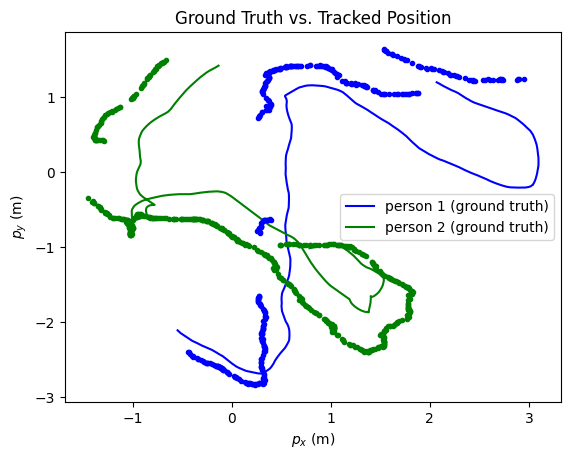

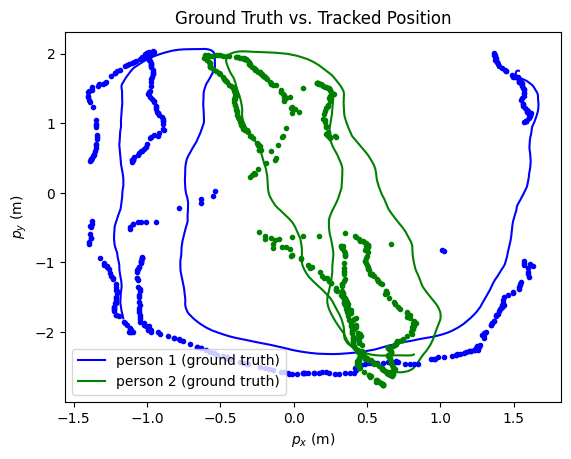

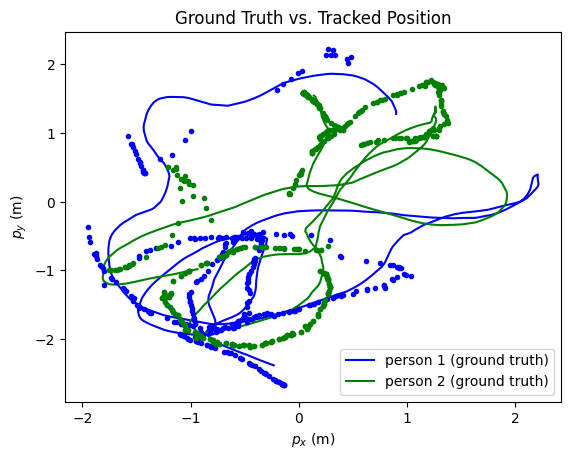

In [9]:
results_files = ['../../results/4_mocap_cam/no_headset/mocap_cam_1_results.csv',
                 '../../results/4_mocap_cam/no_headset/mocap_cam_2_results.csv',
                 '../../results/4_mocap_cam/no_headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Track ids for each ground truth object
    fn=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])


    print(file.split('/')[-1])
    print(gt1_ids)
    print(gt2_ids)

    # Get indices of track ids
    trk1_masks = []
    trk2_masks = []
    for id in gt1_ids:
        trk1_masks.append([results_df.index[results_df['track1_id']==id]])
    for id in gt2_ids:
        trk2_masks.append([results_df.index[results_df['track2_id']==id]])

    plot_str = 'results_df[\'gt1_x\'],results_df[\'gt1_y\'],\'b-\',results_df[\'gt2_x\'],results_df[\'gt2_y\'],\'g-\''
    legend_str = '\'person 1 (ground truth)\',\'person 2 (ground truth)\''

    for ii,id in enumerate(gt1_ids):
        plot_str += ',results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_x\'],results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_y\'],\'b.\''
        # legend_str += ',\'person 1 (fragment '+ str(int(id)) +')\''
        
    for ii,id in enumerate(gt2_ids):
        plot_str += ',results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_x\'],results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_y\'],\'g.\''
        # legend_str += ',\'person 2 (fragment '+ str(int(id)) +')\''

    print()
    plt.figure()
    exec("plt.plot(" + plot_str +")")
    exec("plt.legend([" + legend_str + "])")
    plt.title("Ground Truth vs. Tracked Position")
    plt.xlabel("$p_x$ (m)")
    plt.ylabel("$p_y$ (m)")
 

# Mocap Camera (headset) - MOTA

In [4]:
results_files = ['../../results/4_mocap_cam/headset/mocap_cam_1_results.csv',
                 '../../results/4_mocap_cam/headset/mocap_cam_2_results.csv',
                 '../../results/4_mocap_cam/headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Count gt, fp, fn, and ids
    gt=0
    fp=0
    fn=0
    ids=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])

    ids += (len(gt1_ids)-1)
    ids += (len(gt2_ids)-1)

    print(file.split('/')[-1])
    print("fp: %s" % fp)
    print("fn: %s" % fn)
    print("gt: %s" % gt)
    print("ids: %s" % ids)
    print(gt1_ids)
    print(gt2_ids)
    print("MOTA: %s" % (1 - (fp+fn+ids)/gt))
    print("Avg comp. time: %s" % (np.mean(results_df['delta_t'])/1000000000))
    print("Max comp. time: %s" % (np.max(results_df['delta_t'])/1000000000))
    print("Avg FPS: %s" % (1000000000/np.mean(results_df['delta_t'])))
    print("Min FPS: %s" % (1000000000/np.max(results_df['delta_t'])))
    print()

mocap_cam_1_results.csv
fp: 25
fn: 388
gt: 2112
ids: 4
[1.0, 0.0, 3.0, 0.0, 3.0]
[0.0]
MOTA: 0.8025568181818181
Avg comp. time: 0.0017407493418560606
Max comp. time: 0.618810093
Avg FPS: 574.4652466355425
Min FPS: 1.6160046697880863

mocap_cam_2_results.csv
fp: 121
fn: 327
gt: 2134
ids: 90
[0.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0]
[1.0, 5.0]
MOTA: 0.7478912839737581
Avg comp. time: 0.0011754331349578258
Max comp. time: 0.002356914
Avg FPS: 850.750221564819
Min FPS: 424.28361832463975

mocap_cam_3_results.csv
fp: 45
fn: 461
gt: 2098
ids: 32
[1.0, 3.0, 1.0, 3.0, 4.0]
[0.0, 3.0, 0.0, 3.0

# Mocap camera (headset) - plots

mocap_cam_1_results.csv
[1.0, 0.0, 3.0, 0.0, 3.0]
[0.0]

mocap_cam_2_results.csv
[0.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0]
[1.0, 5.0]

mocap_cam_3_results.csv
[1.0, 3.0, 1.0, 3.0, 4.0]
[0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 5.0]



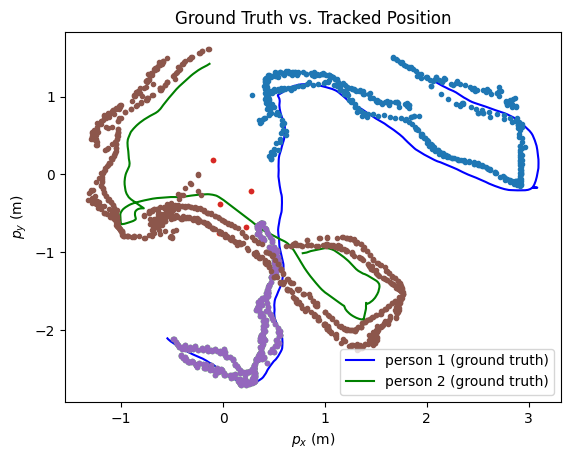

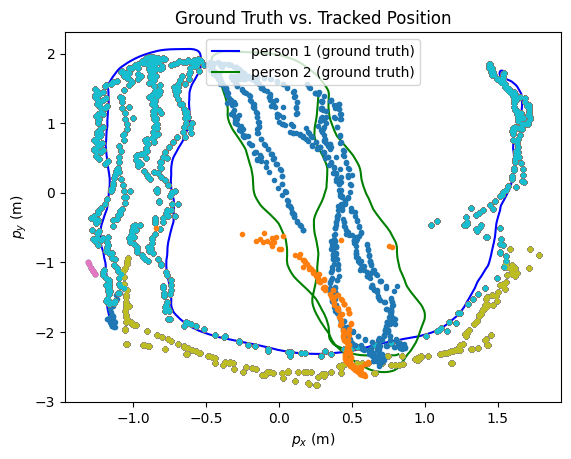

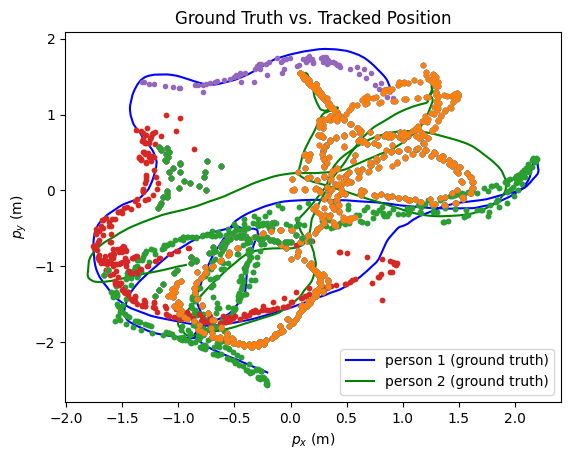

In [11]:
results_files = ['../../results/4_mocap_cam/headset/mocap_cam_1_results.csv',
                 '../../results/4_mocap_cam/headset/mocap_cam_2_results.csv',
                 '../../results/4_mocap_cam/headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Track ids for each ground truth object
    fn=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])


    print(file.split('/')[-1])
    print(gt1_ids)
    print(gt2_ids)

    # Get indices of track ids
    trk1_masks = []
    trk2_masks = []
    for id in gt1_ids:
        trk1_masks.append([results_df.index[results_df['track1_id']==id]])
    for id in gt2_ids:
        trk2_masks.append([results_df.index[results_df['track2_id']==id]])

    plot_str = 'results_df[\'gt1_x\'],results_df[\'gt1_y\'],\'b-\',results_df[\'gt2_x\'],results_df[\'gt2_y\'],\'g-\''
    legend_str = '\'person 1 (ground truth)\',\'person 2 (ground truth)\''

    for ii,id in enumerate(gt1_ids):
        plot_str += ',results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_x\'],results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_y\'],\'.\''
        # legend_str += ',\'person 1 (fragment '+ str(int(id)) +')\''
        
    for ii,id in enumerate(gt2_ids):
        plot_str += ',results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_x\'],results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_y\'],\'.\''
        # legend_str += ',\'person 2 (fragment '+ str(int(id)) +')\''

    print()
    plt.figure()
    exec("plt.plot(" + plot_str +")")
    exec("plt.legend([" + legend_str + "])")
    plt.title("Ground Truth vs. Tracked Position")
    plt.xlabel("$p_x$ (m)")
    plt.ylabel("$p_y$ (m)")
 

# MOCAP Robot (no headset) - MOTA

In [5]:
results_files = ['../../results/5_mocap_robot/no_headset/mocap_robot_static_1_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_2_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_3_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_4_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_1_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_2_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_3_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_4_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Count gt, fp, fn, and ids
    gt=0
    fp=0
    fn=0
    ids=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])

    ids += (len(gt1_ids)-1)
    ids += (len(gt2_ids)-1)

    print(file.split('/')[-1])
    print("fp: %s" % fp)
    print("fn: %s" % fn)
    print("gt: %s" % gt)
    print("ids: %s" % ids)
    print(gt1_ids)
    print(gt2_ids)
    print("MOTA: %s" % (1 - (fp+fn+ids)/gt))
    print("Avg comp. time: %s" % (np.mean(results_df['delta_t'])/1000000000))
    print("Max comp. time: %s" % (np.max(results_df['delta_t'])/1000000000))
    print("Avg FPS: %s" % (1000000000/np.mean(results_df['delta_t'])))
    print("Min FPS: %s" % (1000000000/np.max(results_df['delta_t'])))
    print()

mocap_robot_static_1_results.csv
fp: 165
fn: 236
gt: 416
ids: 6
[13.0, 92.0, 113.0, 124.0, 137.0]
[14.0, 65.0, 112.0]
MOTA: 0.02163461538461542
Avg comp. time: 0.005004085197115385
Max comp. time: 0.61356099
Avg FPS: 199.83672551707394
Min FPS: 1.6298298234377646

mocap_robot_static_2_results.csv
fp: 87
fn: 206
gt: 420
ids: 9
[11.0, 33.0, 94.0, 117.0, 161.0]
[10.0, 32.0, 95.0, 116.0, 144.0, 162.0]
MOTA: 0.28095238095238095
Avg comp. time: 0.0021371016333333335
Max comp. time: 0.007140983
Avg FPS: 467.92346437930286
Min FPS: 140.03674284058653

mocap_robot_static_3_results.csv
fp: 270
fn: 268
gt: 418
ids: 10
[11.0, 24.0, 73.0, 87.0, 99.0, 110.0, 129.0, 140.0]
[0.0, 115.0, 128.0, 0.0]
MOTA: -0.3110047846889952
Avg comp. time: 0.0020984866507177033
Max comp. time: 0.006438246
Avg FPS: 476.53388676930115
Min FPS: 155.32180659142256

mocap_robot_static_4_results.csv
fp: 223
fn: 270
gt: 438
ids: 14
[24.0, 41.0, 78.0, 95.0, 111.0, 140.0, 202.0]
[26.0, 45.0, 70.0, 74.0, 112.0, 137.0, 168.0, 17

# MOCAP Robot (no headset) - Plots

mocap_robot_static_1_results.csv
[13.0, 92.0, 113.0, 124.0, 137.0]
[14.0, 65.0, 112.0]

mocap_robot_static_2_results.csv
[11.0, 33.0, 94.0, 117.0, 161.0]
[10.0, 32.0, 95.0, 116.0, 144.0, 162.0]

mocap_robot_static_3_results.csv
[11.0, 24.0, 73.0, 87.0, 99.0, 110.0, 129.0, 140.0]
[0.0, 115.0, 128.0, 0.0]

mocap_robot_static_4_results.csv
[24.0, 41.0, 78.0, 95.0, 111.0, 140.0, 202.0]
[26.0, 45.0, 70.0, 74.0, 112.0, 137.0, 168.0, 176.0, 198.0]

mocap_robot_moving_1_results.csv
[13.0, 32.0, 103.0]
[14.0, 68.0, 102.0, 129.0, 141.0, 159.0, 170.0, 188.0]

mocap_robot_moving_2_results.csv
[12.0, 35.0, 53.0, 62.0, 139.0]
[23.0, 34.0]

mocap_robot_moving_3_results.csv
[15.0, 109.0]
[14.0, 110.0, 113.0]

mocap_robot_moving_4_results.csv
[0.0, 2.0]
[1.0, 3.0, 6.0]



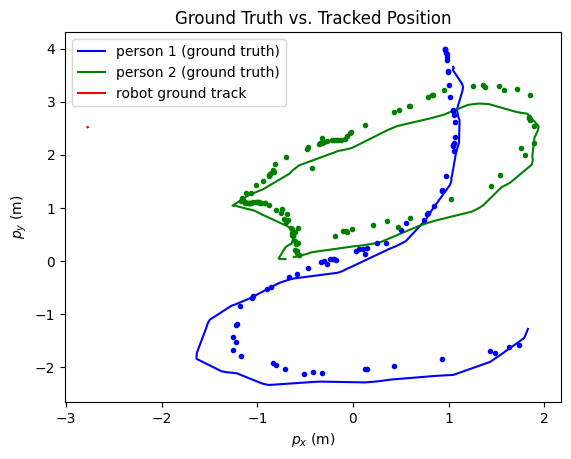

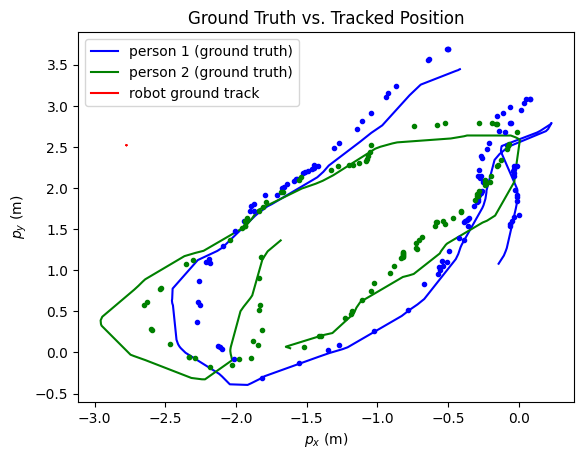

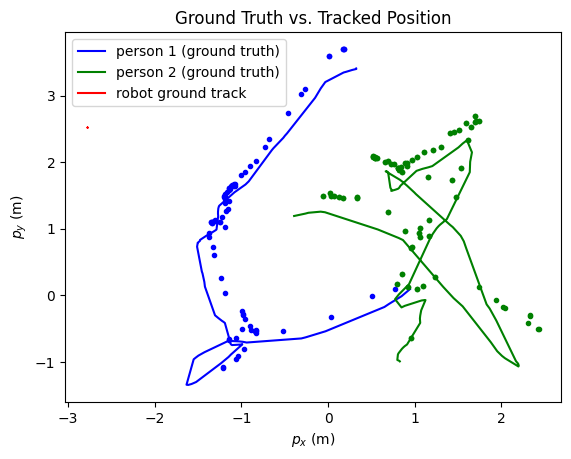

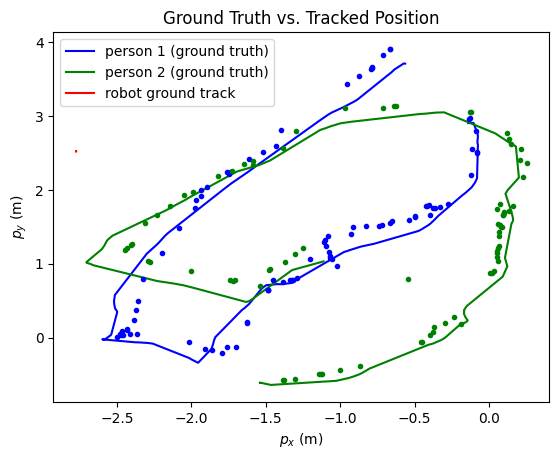

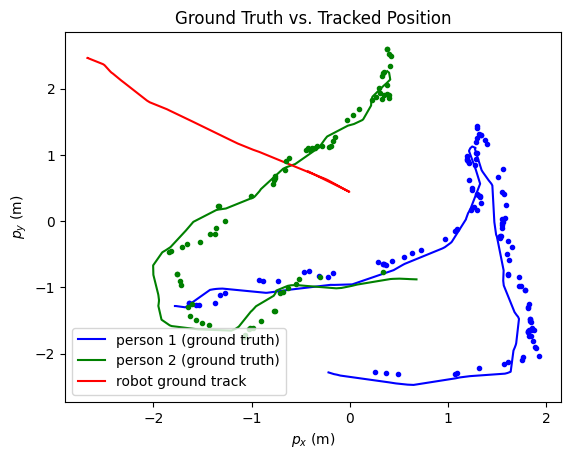

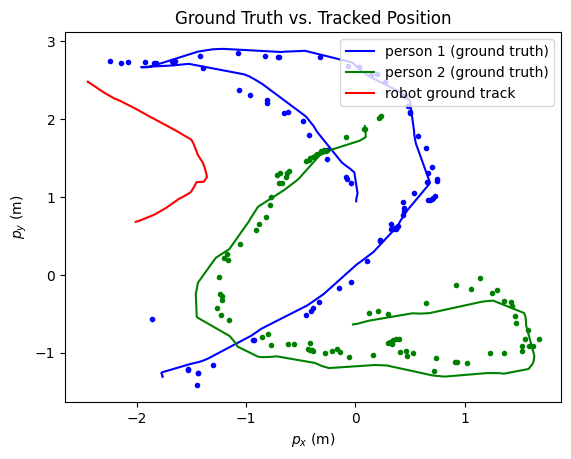

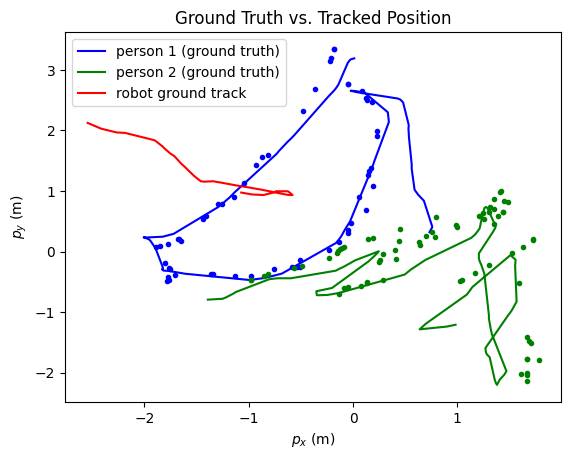

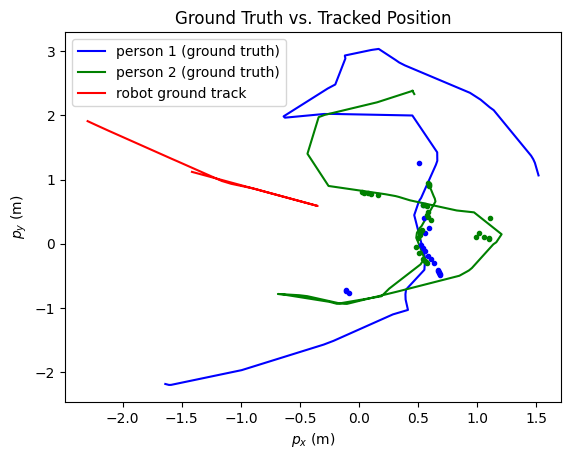

In [24]:
results_files = ['../../results/5_mocap_robot/no_headset/mocap_robot_static_1_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_2_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_3_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_static_4_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_1_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_2_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_3_results.csv',
                 '../../results/5_mocap_robot/no_headset/mocap_robot_moving_4_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Track ids for each ground truth object
    fn=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])


    print(file.split('/')[-1])
    print(gt1_ids)
    print(gt2_ids)

    # Get indices of track ids
    trk1_masks = []
    trk2_masks = []
    for id in gt1_ids:
        trk1_masks.append([results_df.index[results_df['track1_id']==id]])
    for id in gt2_ids:
        trk2_masks.append([results_df.index[results_df['track2_id']==id]])

    plot_str = 'results_df[\'gt1_x\'],results_df[\'gt1_y\'],\'b-\',results_df[\'gt2_x\'],results_df[\'gt2_y\'],\'g-\',results_df[\'robot_x\'],results_df[\'robot_y\'],\'r-\''
    legend_str = '\'person 1 (ground truth)\',\'person 2 (ground truth)\',\'robot ground track\''

    for ii,id in enumerate(gt1_ids):
        plot_str += ',results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_x\'],results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_y\'],\'b.\''
        # legend_str += ',\'person 1 (fragment '+ str(int(id)) +')\''
        
    for ii,id in enumerate(gt2_ids):
        plot_str += ',results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_x\'],results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_y\'],\'g.\''
        # legend_str += ',\'person 2 (fragment '+ str(int(id)) +')\''

    print()
    plt.figure()
    exec("plt.plot(" + plot_str +")")
    exec("plt.legend([" + legend_str + "])")
    plt.title("Ground Truth vs. Tracked Position")
    plt.xlabel("$p_x$ (m)")
    plt.ylabel("$p_y$ (m)")
 

# MOCAP Robot (headset) - MOTA

In [6]:
results_files = ['../../results/5_mocap_robot/headset/mocap_robot_static_1_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_2_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_3_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_4_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_1_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_2_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_3_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_4_results.csv']

for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Count gt, fp, fn, and ids
    gt=0
    fp=0
    fn=0
    ids=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])

    ids += (len(gt1_ids)-1)
    ids += (len(gt2_ids)-1)

    print(file.split('/')[-1])
    print("fp: %s" % fp)
    print("fn: %s" % fn)
    print("gt: %s" % gt)
    print("ids: %s" % ids)
    print(gt1_ids)
    print(gt2_ids)
    print("MOTA: %s" % (1 - (fp+fn+ids)/gt))
    print("Avg comp. time: %s" % (np.mean(results_df['delta_t'])/1000000000))
    print("Max comp. time: %s" % (np.max(results_df['delta_t'])/1000000000))
    print("Avg FPS: %s" % (1000000000/np.mean(results_df['delta_t'])))
    print("Min FPS: %s" % (1000000000/np.max(results_df['delta_t'])))
    print()

mocap_robot_static_1_results.csv
fp: 68
fn: 186
gt: 648
ids: 6
[0.0, 2.0, 4.0, 8.0, 9.0]
[1.0, 3.0, 7.0]
MOTA: 0.5987654320987654
Avg comp. time: 0.0030597956203703702
Max comp. time: 0.585976688
Avg FPS: 326.8192141143584
Min FPS: 1.7065525309771368

mocap_robot_static_2_results.csv
fp: 1
fn: 151
gt: 650
ids: 7
[0.0, 3.0, 9.0]
[1.0, 2.0, 4.0, 5.0, 7.0, 8.0]
MOTA: 0.7553846153846153
Avg comp. time: 0.0011074211384615384
Max comp. time: 0.001930223
Avg FPS: 902.9988369097135
Min FPS: 518.0748545634365

mocap_robot_static_3_results.csv
fp: 166
fn: 267
gt: 646
ids: 6
[1.0, 2.0, 5.0, 6.0, 7.0, 0.0, 8.0]
[0.0]
MOTA: 0.3204334365325078
Avg comp. time: 0.0011585741640866875
Max comp. time: 0.002108853
Avg FPS: 863.1298979364929
Min FPS: 474.19142064430287

mocap_robot_static_4_results.csv
fp: 2
fn: 216
gt: 658
ids: 10
[1.0, 3.0, 4.0, 6.0, 5.0, 10.0]
[0.0, 2.0, 5.0, 7.0, 8.0, 9.0]
MOTA: 0.6534954407294833
Avg comp. time: 0.0011204093738601826
Max comp. time: 0.001773101
Avg FPS: 892.5309117636

# MOCAP Robot (headset) - Plots

mocap_robot_static_1_results.csv
[0.0, 2.0, 4.0, 8.0, 9.0]
[1.0, 3.0, 7.0]

mocap_robot_static_2_results.csv
[0.0, 3.0, 9.0]
[1.0, 2.0, 4.0, 5.0, 7.0, 8.0]

mocap_robot_static_3_results.csv
[1.0, 2.0, 5.0, 6.0, 7.0, 0.0, 8.0]
[0.0]

mocap_robot_static_4_results.csv
[1.0, 3.0, 4.0, 6.0, 5.0, 10.0]
[0.0, 2.0, 5.0, 7.0, 8.0, 9.0]

mocap_robot_moving_1_results.csv
[1.0, 3.0, 4.0, 10.0]
[0.0, 2.0, 7.0, 9.0, 12.0, 13.0, 14.0]

mocap_robot_moving_2_results.csv
[1.0, 3.0, 5.0, 6.0, 4.0, 12.0]
[0.0, 2.0, 4.0, 9.0, 10.0]

mocap_robot_moving_3_results.csv
[1.0, 3.0, 5.0, 7.0, 6.0]
[0.0, 2.0, 3.0, 6.0, 8.0]

mocap_robot_moving_4_results.csv
[0.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 4.0, 5.0, 6.0]



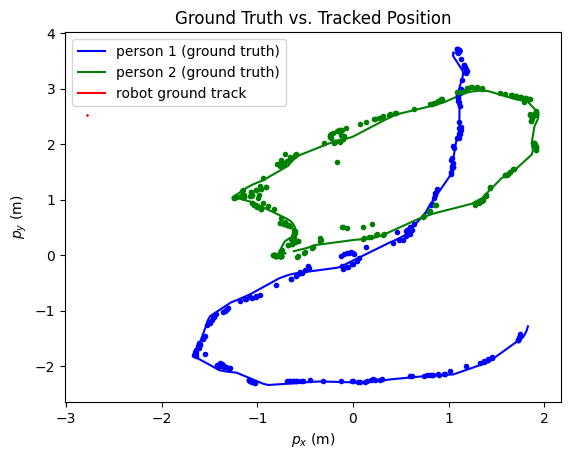

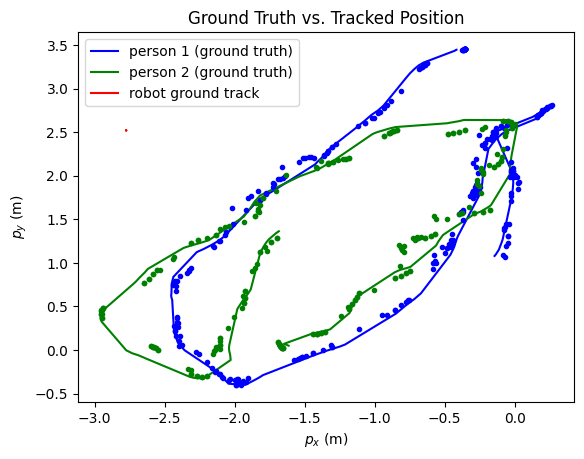

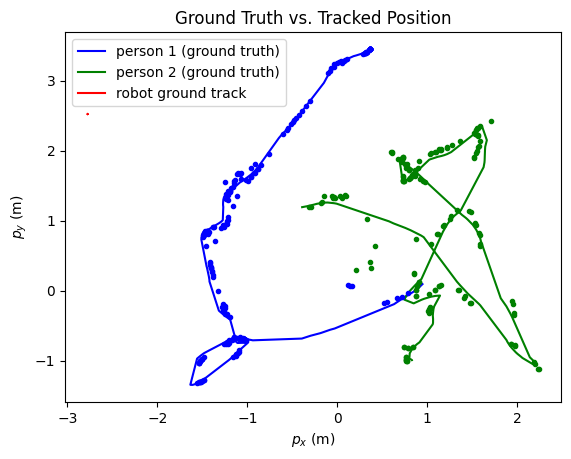

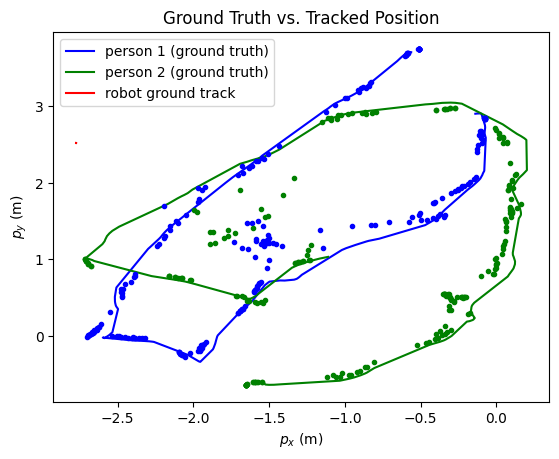

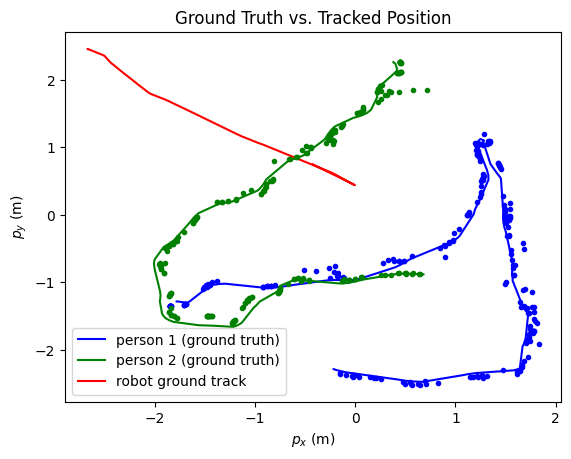

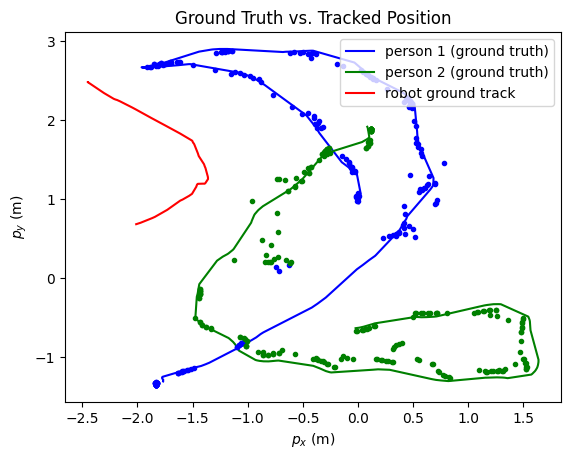

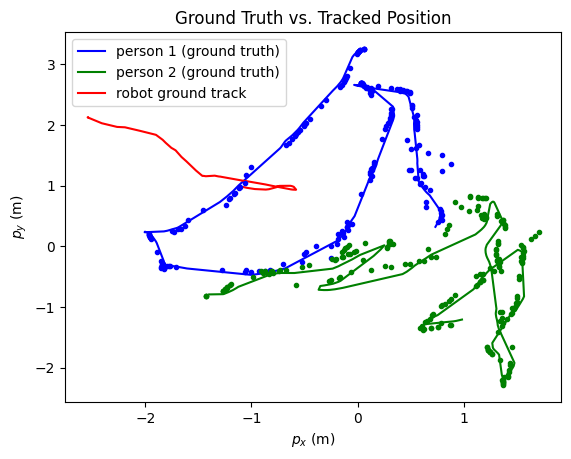

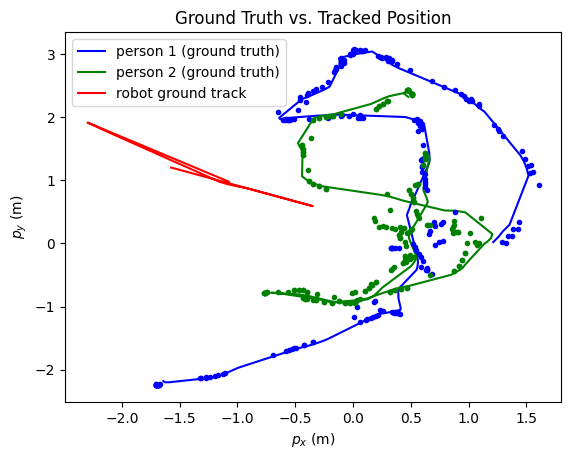

In [20]:
results_files = ['../../results/5_mocap_robot/headset/mocap_robot_static_1_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_2_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_3_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_static_4_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_1_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_2_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_3_results.csv',
                 '../../results/5_mocap_robot/headset/mocap_robot_moving_4_results.csv']

for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Track ids for each ground truth object
    fn=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])


    print(file.split('/')[-1])
    print(gt1_ids)
    print(gt2_ids)

    # Get indices of track ids
    trk1_masks = []
    trk2_masks = []
    for id in gt1_ids:
        trk1_masks.append([results_df.index[results_df['track1_id']==id]])
    for id in gt2_ids:
        trk2_masks.append([results_df.index[results_df['track2_id']==id]])

    plot_str = 'results_df[\'gt1_x\'],results_df[\'gt1_y\'],\'b-\',results_df[\'gt2_x\'],results_df[\'gt2_y\'],\'g-\',results_df[\'robot_x\'],results_df[\'robot_y\'],\'r-\''
    legend_str = '\'person 1 (ground truth)\',\'person 2 (ground truth)\',\'robot ground track\''

    for ii,id in enumerate(gt1_ids):
        plot_str += ',results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_x\'],results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_y\'],\'b.\''
        # legend_str += ',\'person 1 (fragment '+ str(int(id)) +')\''
        
    for ii,id in enumerate(gt2_ids):
        plot_str += ',results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_x\'],results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_y\'],\'g.\''
        # legend_str += ',\'person 2 (fragment '+ str(int(id)) +')\''

    print()
    plt.figure()
    exec("plt.plot(" + plot_str +")")
    exec("plt.legend([" + legend_str + "])")
    plt.title("Ground Truth vs. Tracked Position")
    plt.xlabel("$p_x$ (m)")
    plt.ylabel("$p_y$ (m)")
 

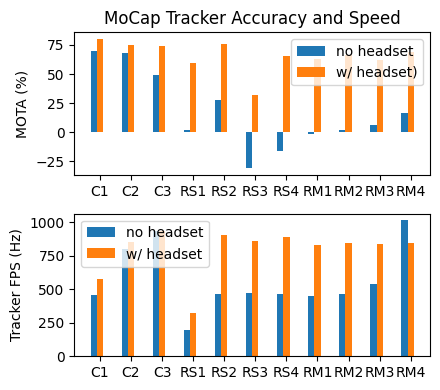

In [73]:
# Generate bar chart with results

################ Cam, no headset
# mocap_cam_1_results.csv
# fp: 4
# fn: 382
# gt: 1292
# ids: 5
# [1.0, 3.0, 5.0, 6.0]
# [0.0, 9.0, 11.0]
# MOTA: 0.6973684210526316
# Avg comp. time: 0.0021672549814241485
# Max comp. time: 0.615491312
# Avg FPS: 461.41317407095266
# Min FPS: 1.6247183030911734

# mocap_cam_2_results.csv
# fp: 11
# fn: 396
# gt: 1304
# ids: 9
# [0.0, 3.0, 7.0, 8.0, 9.0, 10.0]
# [1.0, 2.0, 6.0, 8.0, 9.0]
# MOTA: 0.6809815950920246
# Avg comp. time: 0.001244732259202454
# Max comp. time: 0.001789344
# Avg FPS: 803.3856217727795
# Min FPS: 558.8640306168071

# mocap_cam_3_results.csv
# fp: 45
# fn: 603
# gt: 1298
# ids: 12
# [1.0, 5.0, 10.0, 12.0]
# [0.0, 4.0, 6.0, 7.0, 9.0, 7.0, 10.0, 11.0, 12.0, 13.0]
# MOTA: 0.4915254237288136
# Avg comp. time: 0.001069478340523883
# Max comp. time: 0.001800032
# Avg FPS: 935.0352990881058
# Min FPS: 555.5456791879255

############## Cam + headset
# mocap_cam_1_results.csv
# fp: 25
# fn: 388
# gt: 2112
# ids: 4
# [1.0, 0.0, 3.0, 0.0, 3.0]
# [0.0]
# MOTA: 0.8025568181818181
# Avg comp. time: 0.0017407493418560606
# Max comp. time: 0.618810093
# Avg FPS: 574.4652466355425
# Min FPS: 1.6160046697880863

# mocap_cam_2_results.csv
# fp: 121
# fn: 327
# gt: 2134
# ids: 90
# [0.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0, 5.0, 2.0]
# [1.0, 5.0]
# MOTA: 0.7478912839737581
# Avg comp. time: 0.0011754331349578258
# Max comp. time: 0.002356914
# Avg FPS: 850.750221564819
# Min FPS: 424.28361832463975

# mocap_cam_3_results.csv
# fp: 45
# fn: 461
# gt: 2098
# ids: 32
# [1.0, 3.0, 1.0, 3.0, 4.0]
# [0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 5.0]
# MOTA: 0.7435653002859867
# Avg comp. time: 0.001069625547187798
# Max comp. time: 0.002325917
# Avg FPS: 934.9066153376257
# Min FPS: 429.9379556536196

############################# Mocap robot - no headset
# mocap_robot_static_1_results.csv
# fp: 165
# fn: 236
# gt: 416
# ids: 6
# [13.0, 92.0, 113.0, 124.0, 137.0]
# [14.0, 65.0, 112.0]
# MOTA: 0.02163461538461542
# Avg comp. time: 0.005004085197115385
# Max comp. time: 0.61356099
# Avg FPS: 199.83672551707394
# Min FPS: 1.6298298234377646

# mocap_robot_static_2_results.csv
# fp: 87
# fn: 206
# gt: 420
# ids: 9
# [11.0, 33.0, 94.0, 117.0, 161.0]
# [10.0, 32.0, 95.0, 116.0, 144.0, 162.0]
# MOTA: 0.28095238095238095
# Avg comp. time: 0.0021371016333333335
# Max comp. time: 0.007140983
# Avg FPS: 467.92346437930286
# Min FPS: 140.03674284058653

# mocap_robot_static_3_results.csv
# fp: 270
# fn: 268
# gt: 418
# ids: 10
# [11.0, 24.0, 73.0, 87.0, 99.0, 110.0, 129.0, 140.0]
# [0.0, 115.0, 128.0, 0.0]
# MOTA: -0.3110047846889952
# Avg comp. time: 0.0020984866507177033
# Max comp. time: 0.006438246
# Avg FPS: 476.53388676930115
# Min FPS: 155.32180659142256

# mocap_robot_static_4_results.csv
# fp: 223
# fn: 270
# gt: 438
# ids: 14
# [24.0, 41.0, 78.0, 95.0, 111.0, 140.0, 202.0]
# [26.0, 45.0, 70.0, 74.0, 112.0, 137.0, 168.0, 176.0, 198.0]
# MOTA: -0.15753424657534243
# Avg comp. time: 0.0021479232465753425
# Max comp. time: 0.007873142
# Avg FPS: 465.56598407061523
# Min FPS: 127.0140942459821

# mocap_robot_moving_1_results.csv
# fp: 190
# fn: 226
# gt: 418
# ids: 9
# [13.0, 32.0, 103.0]
# [14.0, 68.0, 102.0, 129.0, 141.0, 159.0, 170.0, 188.0]
# MOTA: -0.01674641148325362
# Avg comp. time: 0.002223673650717703
# Max comp. time: 0.007426258
# Avg FPS: 449.70627757236065
# Min FPS: 134.65732001231308

# mocap_robot_moving_2_results.csv
# fp: 161
# fn: 216
# gt: 390
# ids: 5
# [12.0, 35.0, 53.0, 62.0, 139.0]
# [23.0, 34.0]
# MOTA: 0.02051282051282055
# Avg comp. time: 0.002159954902564103
# Max comp. time: 0.007326143
# Avg FPS: 462.97262911039974
# Min FPS: 136.49747213506478

# mocap_robot_moving_3_results.csv
# fp: 104
# fn: 230
# gt: 358
# ids: 3
# [15.0, 109.0]
# [14.0, 110.0, 113.0]
# MOTA: 0.05865921787709494
# Avg comp. time: 0.001860886843575419
# Max comp. time: 0.006160827
# Avg FPS: 537.37818796045
# Min FPS: 162.31587090499377

# mocap_robot_moving_4_results.csv
# fp: 7
# fn: 207
# gt: 260
# ids: 3
# [0.0, 2.0]
# [1.0, 3.0, 6.0]
# MOTA: 0.16538461538461535
# Avg comp. time: 0.0009853455153846153
# Max comp. time: 0.001769585
# Avg FPS: 1014.8724324478854
# Min FPS: 565.1042476060771

######################## robot - headset
# mocap_robot_static_1_results.csv
# MOTA: 0.5987654320987654
# Avg comp. time: 0.0030597956203703702
# Max comp. time: 0.585976688
# Avg FPS: 326.8192141143584
# Min FPS: 1.7065525309771368

# mocap_robot_static_2_results.csv
# MOTA: 0.7553846153846153
# Avg comp. time: 0.0011074211384615384
# Max comp. time: 0.001930223
# Avg FPS: 902.9988369097135
# Min FPS: 518.0748545634365

# mocap_robot_static_3_results.csv
# MOTA: 0.3204334365325078
# Avg comp. time: 0.0011585741640866875
# Max comp. time: 0.002108853
# Avg FPS: 863.1298979364929
# Min FPS: 474.19142064430287

# mocap_robot_static_4_results.csv
# MOTA: 0.6534954407294833
# Avg comp. time: 0.0011204093738601826
# Max comp. time: 0.001773101
# Avg FPS: 892.5309117636778
# Min FPS: 563.9836647771334

# mocap_robot_moving_1_results.csv
# MOTA: 0.6300309597523219
# Avg comp. time: 0.00120160093498452
# Max comp. time: 0.002082835
# Avg FPS: 832.2230541647197
# Min FPS: 480.1148434705582

# mocap_robot_moving_2_results.csv
# MOTA: 0.662828947368421
# Avg comp. time: 0.0011859848618421052
# Max comp. time: 0.001820062
# Avg FPS: 843.181082806379
# Min FPS: 549.4318325419683

# mocap_robot_moving_3_results.csv
# MOTA: 0.6188925081433225
# Avg comp. time: 0.0011911983680781759
# Max comp. time: 0.002067977
# Avg FPS: 839.4907404157659
# Min FPS: 483.5643723310269

# mocap_robot_moving_4_results.csv
# MOTA: 0.6912280701754385
# Avg comp. time: 0.0011799464070175439
# Max comp. time: 0.001886968
# Avg FPS: 847.4961185123823
# Min FPS: 529.9506933874873





cases = ("C1", "C2", "C3", "RS1", "RS2", "RS3", "RS4", "RM1", "RM2", "RM3", "RM4")
mota_data = {
    'no headset': (69.73684210526316, 68.09815950920246, 49.15254237288136,2.163461538461542,28.095238095238095,-31.10047846889952,-15.753424657534243,-1.674641148325362,2.051282051282055,5.865921787709494,16.538461538461535),
    'w/ headset)': (80.25568181818181, 74.78912839737581, 74.35653002859867,
                          59.87654320987654,75.53846153846153,32.04334365325078,65.34954407294833,
                          63.00309597523219,66.2828947368421,61.88925081433225,69.12280701754385),
}
fps_data = {
    'no headset': (461.41317407095266, 803.3856217727795, 935.0352990881058,199.83672551707394,467.92346437930286,476.53388676930115,465.56598407061523,449.70627757236065,462.97262911039974,537.37818796045,1014.8724324478854),
    'w/ headset': (574.4652466355425, 850.750221564819, 934.9066153376257,
                              326.8192141143584,902.9988369097135,863.1298979364929,892.5309117636778,
                              832.2230541647197,843.181082806379,839.4907404157659,847.4961185123823),
}
x = np.arange(len(cases))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(2,1,tight_layout=True, figsize=(4.5,4.))

for attribute, measurement in mota_data.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, measurement, width, label=attribute)
    # ax[0].bar_label(rects, padding=0, fmt='%2.f')
    multiplier += 1
ax[0].set_ylabel('MOTA (%)')
ax[0].set_xticks(x + width, cases)
ax[0].legend()

multiplier = 0
for attribute, measurement in fps_data.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, measurement, width, label=attribute)
    # ax[1].bar_label(rects, padding=0, fmt='%2.f')
    multiplier += 1
ax[1].set_ylabel('Tracker FPS (Hz)')
ax[1].set_xticks(x + width, cases)
ax[1].legend()

ax[0].set_title('MoCap Tracker Accuracy and Speed')
# Add some text for labels, title and custom x-axis tick labels, etc.

# ax.set_title('MoCap Experiment Results')

# ax.set_ylim(0, 250)
plt.savefig('mocap_results.png')
plt.show()
